In [7]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [8]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    N = y.shape[0]
    w_opt = np.dot(np.dot(np.linalg.inv(np.dot(tx.T,tx)),tx.T),y)
    e = y - np.dot(tx,w_opt)
    mse_opt = np.dot(e.T,e)/(2*N)
    return mse_opt, w_opt
    # returns mse, and optimal weights
    # ***************************************************
    raise NotImplementedError

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [9]:
import datetime
from helpers import *
from plots import base_visualization

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # Start the LSQ
    start_time = datetime.datetime.now()
    loss_opt, [w0_opt, w1_opt] = least_squares(y,tx)
    end_time = datetime.datetime.now()
    execution_time = (end_time - start_time).total_seconds()
    # Print the results
    print("Grid Search: loss*={loss}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
         loss=loss_opt, w0=w0_opt, w1=w1_opt, t=execution_time))

    # Plot the results
    fig = base_visualization(w0_opt, w1_opt, mean_x, std_x, height, weight)
    return
    # ***************************************************
    raise NotImplementedError

Test it here

Grid Search: loss*=15.3858878688, w0*=73.2939220021, w1*=13.479712435, execution time=0.512 seconds


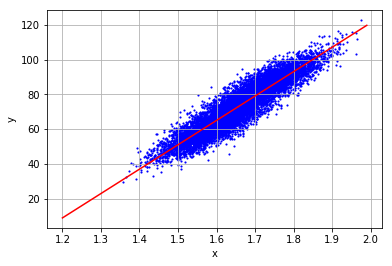

In [10]:
test_your_least_squares()

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [144]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [145]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    poly_x = np.ones([x.shape[0]])
    for i in range(1,degree+1):
        x_ = np.power(x,i)
        poly_x = np.c_[poly_x, np.power(x,i)]
    poly_x = np.array(poly_x)
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    return poly_x
    # ***************************************************
    raise NotImplementedError

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [146]:
def compute_mse(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    #if method == "MSE":
    # TODO: compute loss by MSE
    e = y - tx.dot(w)
    N = e.shape[0]
    L_w = np.sum(e*e)/(2*N)
    # ***************************************************
    # raise NotImplementedError
    return L_w
   # else if method == "MAE"

In [176]:
#from costs import compute_mse
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        tx = build_poly(x, degree)
        # ***************************************************
        # raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        
        rmse , weights = least_squares(y, tx)
        rmse_ = compute_mse(y, tx, weights)
        # ***************************************************
        # raise NotImplementedError

        print("Processing {i}th experiment, degree={d}, rmse={loss}, rmse_={loss_}".format(
              i=ind + 1, d=degree, loss=rmse, loss_=rmse_))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()
    

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.111333517265, rmse_=0.111333517265
Processing 2th experiment, degree=3, rmse=0.0334325261971, rmse_=0.0334325261971
Processing 3th experiment, degree=7, rmse=0.0311647341439, rmse_=0.0311647341439
Processing 4th experiment, degree=12, rmse=0.429506417532, rmse_=0.429506417532


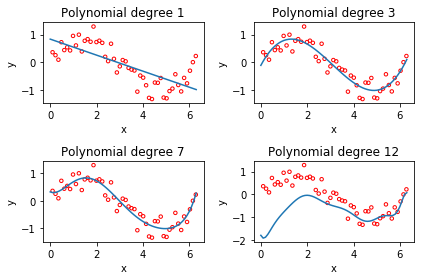

In [177]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [308]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    yx = zip(y,x)
    np.random.shuffle(yx)
    yx = np.array(yx)
    ind_cut = int(y.shape[0]*ratio)
    x_tr, x_te = yx[:ind_cut,1:], yx[ind_cut:,1:]
    y_tr, y_te = yx[:ind_cut,0], yx[ind_cut:,0]
    return x_tr, x_te, y_tr, y_te
    # split the data based on the given ratio: TODO
    # ***************************************************
    raise NotImplementedError

Then, test your `split_data` function below.

In [216]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    tx_tr, tx_te = build_poly(x_tr, degree), build_poly(x_te, degree)
    
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    rmse_tr , weight = least_squares(y_tr, tx_tr)
    rmse_te = compute_mse(y_te, tx_te, weight)
    # ***************************************************
    # raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    #raise NotImplementedError
    #print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          #p=ratio, d=degree, tr=rmse_tr, te=rmse_te))
    return rmse_tr, rmse_te

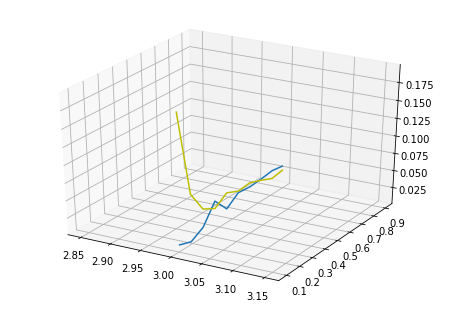

In [245]:
from mpl_toolkits.mplot3d import Axes3D
seed = 6
#degrees = [1, 3, 7, 12]
degrees = np.arange(3,4)
#split_ratios = [0.9, 0.5, 0.1]
split_ratios = np.linspace(0.9, 0.1, 10)
rmse_tr = np.zeros([len(split_ratios), len(degrees)])
rmse_te = np.copy(rmse_tr)
for i, split_ratio in enumerate(split_ratios):
    for j, degree in enumerate(degrees):
        rmse_tr[i,j], rmse_te[i,j]= train_test_split_demo(x, y, degree, split_ratio, seed)
fig = plt.figure()
ax = Axes3D(fig)        
X, Y = np.meshgrid(degrees, split_ratios) 
#ax.plot_surface(X, Y, rmse_tr, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
ax.plot_wireframe(X, Y, rmse_tr)
ax.plot_wireframe(X, Y, rmse_te, color='y')

# 3 Ridge Regression
Please fill in the function below.

In [289]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    N = y.shape[0]
    M = tx.shape[1]
    w_opt = np.dot(np.dot(np.linalg.inv(np.dot(tx.T,tx)+lambda_*np.eye(M)/(2*N)),tx.T),y)
    e = y - np.dot(tx,w_opt)
    mse_opt = np.dot(e.T,e)/(2*N)
    return mse_opt, w_opt
    # ridge regression: TODO
    # ***************************************************
    raise NotImplementedError

In [306]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 4, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    # split the data, and return train and test data: TODO
    # ***************************************************
    # raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    tx_tr, tx_te = build_poly(x_tr, degree), build_poly(x_te, degree)
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    # raise NotImplementedError

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        rmse_tr_ , weight = ridge_regression(y_tr, tx_tr, lambda_)
        rmse_te_ = compute_mse(y_te, tx_te, weight)
        rmse_tr.append(rmse_tr_)
        rmse_te.append(rmse_te_)
        # ridge regression with a given lambda
        # ***************************************************
        #print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
              # p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

    # raise NotImplementedError


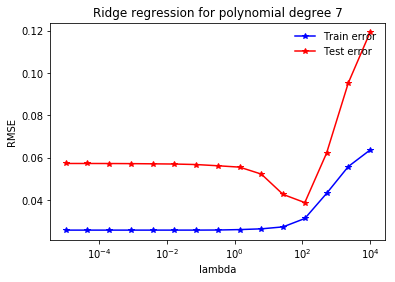

In [311]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)